In [1]:
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import pandas as pd
import math
import matplotlib.pyplot as plt
import pylab
from random import random
%matplotlib inline
pylab.rcParams['figure.figsize'] = (16.0, 9.0)
import warnings

In [2]:
class Country():
    def __init__(self, iso, name, geometry):
        self.iso = iso
        self.name = name
        self.geometry = geometry
        self.properties = {}
    def __str__(self):
        return self.iso
    def __repr__(self):
        return '<Country Object "' + self.iso + '">'

In [3]:
shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries_on_map = reader.records()

countries = []
for country_on_map in countries_on_map:
    iso = country_on_map.attributes['iso_a3']
    name = country_on_map.attributes['name']
    geometry = country_on_map.geometry
    countries.append(Country(iso, name, geometry))

In [4]:
def plot_map(country_list, property_to_plot, colormap='rainbow', min_value=0, max_value=1):
    def color_country(ax, color, country):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                            facecolor=color)
    cmap=plt.get_cmap(colormap)

    # hack colorbar
    CS3 = plt.imshow([[min_value, 0], [0, max_value]], cmap=cmap)
    plt.clf()

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ax = plt.axes(projection=cartopy.crs.Robinson())
    ax.add_feature(cartopy.feature.OCEAN)

    missing_countries = []
    for country in countries:
        color = (1,1,1)
        try:
            if not math.isnan(country.properties[property_to_plot]):
                color = cmap((country.properties[property_to_plot] - min_value)/(max_value - min_value))
        except KeyError as k:
            missing_countries.append(country.iso)
        color_country(ax, color, country)
    if missing_countries:
        print("No property", property_to_plot, "for countries", missing_countries, ".")
    plt.colorbar(CS3, orientation='horizontal', aspect=50)
    plt.show()

In [5]:
temperature_data = pd.read_excel('/home/julian/Code/hpk-symposium/resources/cckp_historical_data_0.xls', 
                                 sheetname='Country_temperatureCRU')
iso = temperature_data['ISO_3DIGIT']
annual_mean_temperature = temperature_data['Annual_temp']
annual_mean_temperature.index = iso.values

In [6]:
def add_country_property(countries, property_name, property_table):
    for country in countries:
        try:
            country.properties[property_name] = property_table[country.iso]
        except KeyError as k:
            country.properties[property_name] = float('NaN')

In [7]:
add_country_property(countries, 'temperature', annual_mean_temperature)

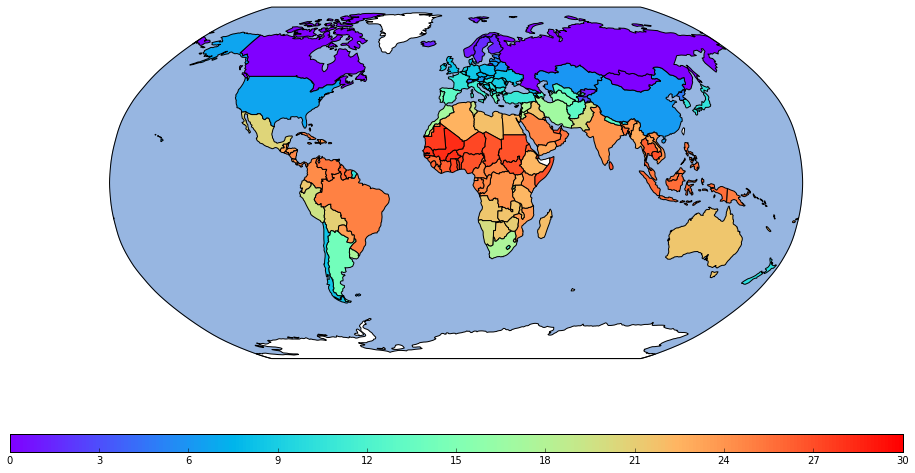

In [8]:
plot_map(countries, 'temperature', 'rainbow', min_value=0, max_value=30)

In [9]:
refugees_outgoing_data = pd.read_csv('/home/julian/Code/hpk-symposium/resources/sm.pop.refg.or_Indicator_en_csv_v2.csv', 
                                   header=1)
iso = refugees_outgoing_data['Country Code']
refugees_outgoing = refugees_outgoing_data['2012']
refugees_outgoing.index = iso
add_country_property(countries, 'refugees_outgoing', refugees_outgoing)

refugees_incoming_data = pd.read_csv('/home/julian/Code/hpk-symposium/resources/sm.pop.refg_Indicator_en_csv_v2.csv', 
                                        header=1)
iso = refugees_incoming_data['Country Code']
refugees_incoming = refugees_incoming_data['2012']
refugees_incoming.index = iso
add_country_property(countries, 'refugees_incoming', refugees_incoming)

In [11]:
for country in countries:
    country.properties['net_refugees'] = country.properties['refugees_outgoing'] - country.properties['refugees_incoming']

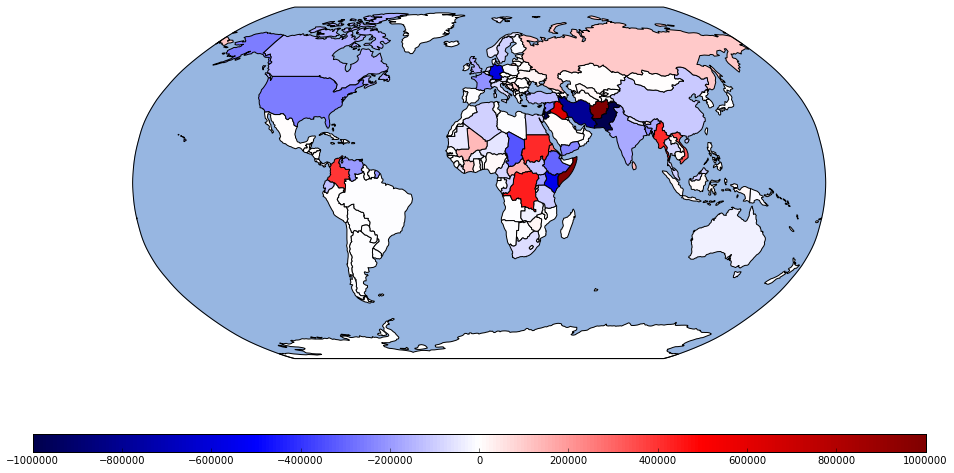

In [12]:
plot_map(countries, 'net_refugees', colormap='seismic', min_value=-1e+6, max_value=1e+6)

In [13]:
population_data = pd.read_csv('/home/julian/Code/hpk-symposium/resources/sp.pop.totl_Indicator_en_csv_v2.csv', header=2)
iso = population_data['Country Code']
population = population_data['2010']
population.index = iso

In [14]:
add_country_property(countries, 'population', population)

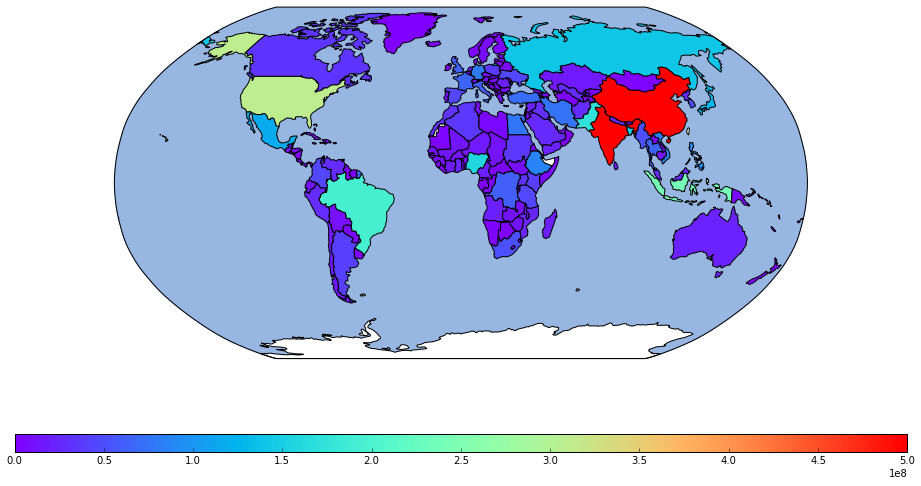

In [15]:
plot_map(countries, 'population', max_value=.5e+9)

In [16]:
for country in countries:
    country.properties['net_refugees_relative'] = country.properties['net_refugees'] / country.properties['population']

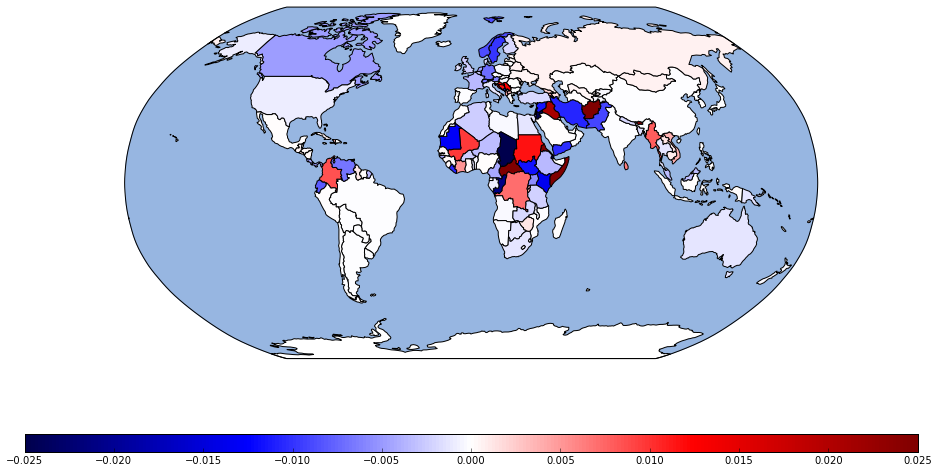

In [17]:
plot_map(countries, 'net_refugees_relative', colormap='seismic', min_value=-.025, max_value=.025)

In [18]:
for country in countries:
    country.properties['temperature'] = country.properties['temperature'] + 1 

In [28]:
MOST_COMFORTABLE_TEMPERATURE = 18.0
FRACTION_LEAVING_PER_UNCOMFORTABLE_DEGREE = .0005
REFUGEE_INCREASE_PER_UNCOMFORTABLE_DEGREE = .2

In [29]:
for country in countries:
    temperature = country.properties['temperature']
    net_refugees = country.properties['net_refugees']
    population = country.properties['population']
    uncomfortable_heat = max(0, temperature - MOST_COMFORTABLE_TEMPERATURE)
    regular_population_leaving = uncomfortable_heat * FRACTION_LEAVING_PER_UNCOMFORTABLE_DEGREE * population
    increased_refugee_stream = max(0, uncomfortable_heat * REFUGEE_INCREASE_PER_UNCOMFORTABLE_DEGREE * net_refugees)
    country.properties['climate_refugees'] = regular_population_leaving + increased_refugee_stream

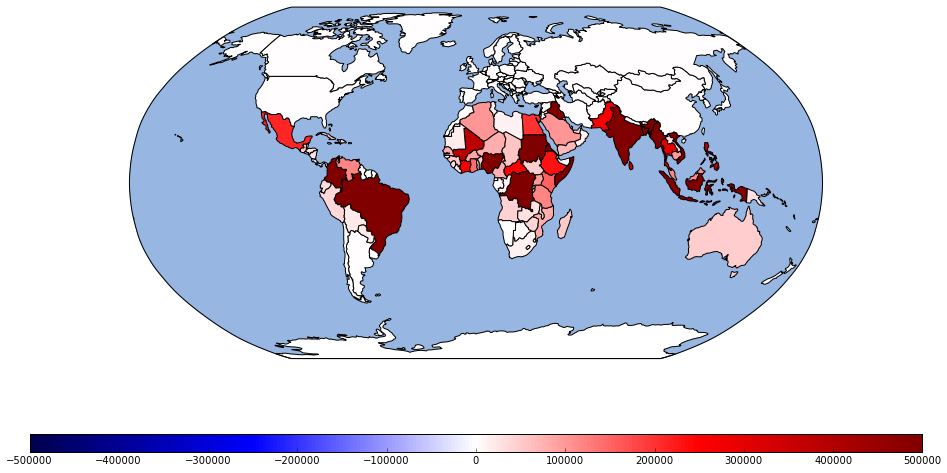

In [30]:
plot_map(countries, 'climate_refugees', max_value=.5e6, min_value = -.5e6, colormap='seismic')

In [33]:
total_climate_refugees = 0
for country in countries:
    if math.isfinite(country.properties['climate_refugees']):
        total_climate_refugees += country.properties['climate_refugees']
print(total_climate_refugees)

20776157.461


In [ ]:
total_gdp = 0


(array([  1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,
          3.,   1.,   0.,   2.,   3.,   7.,   3.,  10.,   6.,   8.,   4.,
          3.,   4.,   2.,   1.,   2.,   1.,   4.,   2.,   4.,   5.,   9.,
          9.,   9.,  16.,  20.,  13.,  15.,   6.]),
 array([ -9.14271398,  -8.20664929,  -7.27058461,  -6.33451992,
         -5.39845523,  -4.46239054,  -3.52632586,  -2.59026117,
         -1.65419648,  -0.71813179,   0.2179329 ,   1.15399758,
          2.09006227,   3.02612696,   3.96219165,   4.89825634,
          5.83432102,   6.77038571,   7.7064504 ,   8.64251509,
          9.57857978,  10.51464446,  11.45070915,  12.38677384,
         13.32283853,  14.25890322,  15.1949679 ,  16.13103259,
         17.06709728,  18.00316197,  18.93922666,  19.87529134,
         20.81135603,  21.74742072,  22.68348541,  23.6195501 ,
         24.55561478,  25.49167947,  26.42774416,  27.36380885,  28.29987354]),
 <a list of 40 Patch objects>)

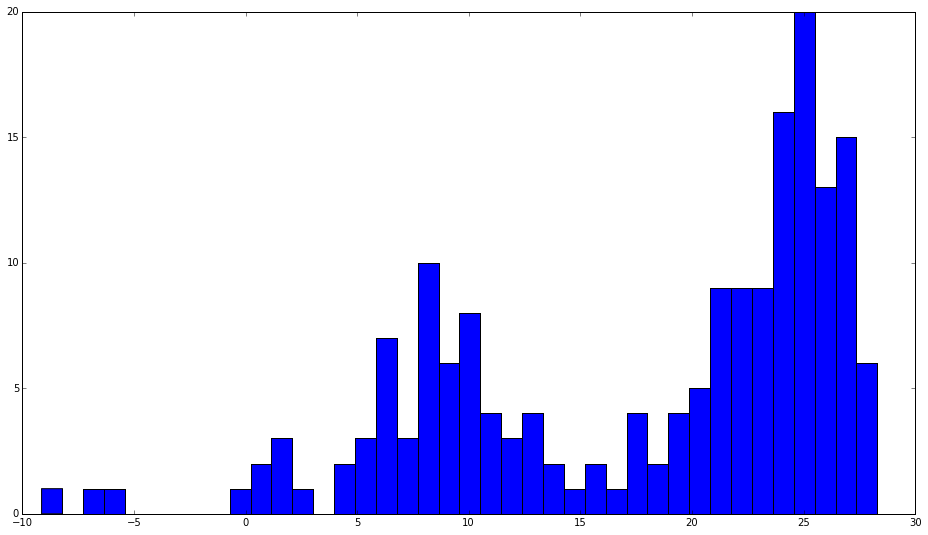

In [48]:
plt.hist(annual_mean_temperature, bins=40)

In [43]:
economic_data = pd.read_csv('/home/julian/Code/hpk-symposium/resources/d67eb1a5-9d13-4a2e-ae73-c61544832c1c_Data.csv', header=0)
#gdp_per_capita = economic_data['Series Name'=='GDP per capita (current US$)']
#iso = economic_data['Country Code']
#population = population_data['2010']
#population.index = iso
economic_data.where(economic_data['Series Name'] == 'GDP per capita (current US$)')

KeyError: 'Series Name'

In [60]:
economic_data.where(economic_data.values=='GDP per capita (current US$)')

,﻿Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
for c in countries:
    if c.name == "Saudi Arabia":
        print(c.properties)

{'population': 27258387.0, 'climate_refugees': 104645.83802227158, 'refugees_incoming': 577.0, 'net_refugees': 241.0, 'refugees_outgoing': 818.0, 'net_refugees_relative': 8.8413155187795965e-06, 'temperature': 25.651007337199999}
